## Simplified two-dimensional visualization

Visualizing data from the *dicta* in a simplified two-dimensional form is a useful first step toward understanding how stylometric analysis works in practice. For the purpose of the following discussion, the *dicta* will be divided into four samples:

+ the hypothetical case statements (*dicta initiales* or *themata*) that introduce the thirty-six cases in Part II of the *Decretum*,
+ the first-recension *dicta* from Parts I and II of the *Decretum*,
+ the first- and second-recension *dicta* from *de Penitentia*, and
+ the second-recension *dicta* from Parts I and II of the *Decretum*.

In the following code, tables, and plots, these four samples will be labelled Gratian0, Gratian1, dePen, and Gratian2. The Gratian1 and Gratian2 samples, representing the first- and second-recension *dicta* from Parts I and II of the *Decretum*, were generated according to the procedure detailed in the preceding section on corpus preparation.

Although it is theoretically possible to split the text of the hypothetical case statements (*themata*) and the *dicta* from *de Penitentia* into separate first- and second-recension samples following the same procedure used to produce the Gratian1 and Gratian2 samples, as a practical matter it is not useful to do so. The only case statement (*thema*) for which Winroth's appendix notes a textual difference is C.19 d.init.[@winroth_making_2000, 216] The first-recension version of the text of C.19 d.init. omits a 13-word clause added to the second recension version, seemingly for the purpose of piling up descriptive detail. (*unus relicta propria ecclesia eo inuito, alter dimissa regulari canonica cenobio se contulit*). Gratian0, the sample containing the cases statements, is therefore made up of 99.6% first-recension text. Similarly, the number of words added to the *dicta* in *de Penitentia* between the first and second recensions is relatively minimal, 556 words out of a total of 10,081 words; dePen, the sample containing the *dicta* from *de Penitentia*, is therefore made up of 94.5% first-recension text.

In addition to plotting a two-dimensional visualization of word frequency data from the *dicta*, this section will set the stage for a subsequent one, which introduces an authorship attribution technique known as Burrows's Delta. Burrows's algorithm calculates a metric for the distance between a sample of unknown authorship with a corpus of samples of known authorship. In that discussion, Gratian0, the sample containing the hypothetical case statements (*themata*), will be treated as the sample of unknown authorship. Gratian1, dePen, and Gratian2, the samples containing the first-recension *dicta*, the first- and second-recension *dicta* from *de Penitentia*, and the second-recension *dicta*, will be treated as the corpus of samples of known authorship. Therefore, the values for means and standard deviations that provide the basis of comparison between the unattributed sample and the attributed corpus have to be calculated without taking the values from Gratian0 into account.

The demonstration of Burrows's Delta will make a point of the fact that the technique can be used at a higher number of dimensions (n > 3) than can be visualized in graphical form. Word frequency data for the four most frequent words (MFWs) will therefore be collected from the start, even though the data for the third- and fourth-most frequent words will not be used in this section.

First, identify the four most frequent words in the comparison text samples, Gratian1, dePen, and Gratian2:

In [1]:
import re

def get_tokens(filename):
    '''open text file and return list of tokens'''
    # text = open(filename, 'r').read().lower()
    f = open(filename, 'r') # open file
    text = f.read() # read file
    text = text.lower() # lower-case text
    tokens = [word for word in re.split('\W', text) if word != ''] # remove punctuation
    return tokens

def get_features(samples):
    tokens = []
    for sample in samples:
        tokens += get_tokens('../corpus/' + sample + '.txt')
    types = list(set(tokens)) # create unordered list of unique words
    tmp = dict.fromkeys(types, 0) # create temporary dictionary, initialize counts to 0
    for token in tokens: tmp[token] += 1 # count words
    # re-order words in temporary dictionary numerically by descending frequency
    # re-order words with same frequency alphabetically
    features = { 
        key: value for key, value in sorted(tmp.items(),
        key = lambda item: (-item[1], item[0]))
    }
    return features

samples = ['Gratian1', 'dePen', 'Gratian2']
features = get_features(samples)
list(features.keys())[:4] # 4 most frequent words (MFWs)

['in', 'non', 'et', 'est']

The four most frequent words in the three comparison samples Gratian1, dePen, and Gratian2---the samples treated as being of known authorship---are *in*, *non*, *et*, and *est*. The selection of samples makes a difference to the order. Were Gratian0, the sample treated as being of unknown authorship, to be included, the four most frequent words would be *in*, *et*, *non*, and *est*. (The rank reversal between the second- and third-most frequent words is a result of the fact that *non* occurs quite infrequently in Gratian0; see the table below.) After identifying the four most frequent words in the three comparison samples, next, count the numbers of occurrences of those words in each of the samples:[^b]

[^b]: Much of the analysis from this point forward will take advantage of the specialized capabilities of a Python software library called pandas. The name pandas is not a reference to the charismatic animal, but an acronym derived from the term "panel data." The package is widely used in the field of data science, and provides a dataframe abstraction that represents two-dimensional numerical word-frequency data in a much more natural way than native Python data structure like lists and dictionaries do. The pandas dataframe abstraction can be thought of as a close analog to the Excel spreadsheets that were such a ubiquitous feature of John Burrows's and David Hoover's early experiments in stylometry.

In [2]:
import pandas as pd

def get_counts(features, samples):
    columns = {}
    for sample in samples:
        columns[sample] = []
        tmp = get_features([sample])
        for feature in features:
            columns[sample].append(tmp.get(feature, 0))
    return pd.DataFrame(columns, index = features)

mfws = list(features.keys())[:4] # 4 most frequent words (MFWs)
unknown = 'Gratian0'
counts = get_counts(mfws, [unknown] + samples)
# save dataframes as markdown tables for pandoc
f = open('tables.md', 'w')
f.write('---\nauthor: Paul Evans\ntitle: Chapter 4\nsubtitle: Tables\n---\n\n') # YAML header
f.write(counts.to_markdown() + '\n\n')
counts

,Gratian0,Gratian1,dePen,Gratian2
in,74,1450,252,411
non,24,1360,270,306
et,70,1293,260,345
est,13,965,182,167


|     |   Gratian0 |   Gratian1 |   dePen |   Gratian2 |
|:----|-----------:|-----------:|--------:|-----------:|
| in  |         74 |       1450 |     252 |        411 |
| non |         24 |       1360 |     270 |        306 |
| et  |         70 |       1293 |     260 |        345 |
| est |         13 |        965 |     182 |        167 |

After determining the number of occurrences of the MFWs, next, determine the length (total word count) for each of the samples:

In [3]:
def get_lengths(samples):
    filenames = ['../corpus/' + sample + '.txt' for sample in samples]
    lengths = {}
    for i in range(len(samples)):
       lengths[samples[i]] = len(get_tokens(filenames[i]))
    return pd.DataFrame(lengths, index = ['words'])

lengths = get_lengths([unknown] + samples)
f.write(lengths.to_markdown() + '\n\n')
lengths

,Gratian0,Gratian1,dePen,Gratian2
words,3605,56713,10081,14255


|       |   Gratian0 |   Gratian1 |   dePen |   Gratian2 |
|:------|-----------:|-----------:|--------:|-----------:|
| words |       3605 |      56713 |   10081 |      14255 |

Finally, divide the number of occurrences of the MFWs in the samples by the sample length and multiply the quotient by 1,000 to determine the normalized frequency of occurrence per 1,000 words for each of the MFWs in each of the samples:

In [4]:
pd.options.display.float_format = '{:,.4f}'.format
frequencies = (counts / lengths.values) * 1000
f.write(frequencies.to_markdown() + '\n\n')
frequencies

,Gratian0,Gratian1,dePen,Gratian2
in,20.5270,25.5673,24.9975,28.8320
non,6.6574,23.9804,26.7831,21.4662
et,19.4175,22.7990,25.7911,24.2020
est,3.6061,17.0155,18.0538,11.7152


|     |   Gratian0 |   Gratian1 |   dePen |   Gratian2 |
|:----|-----------:|-----------:|--------:|-----------:|
| in  |    20.5270 |    25.5673 | 24.9975 |    28.8320 |
| non |     6.6574 |    23.9804 | 26.7831 |    21.4662 |
| et  |    19.4175 |    22.7990 | 25.7911 |    24.2020 |
| est |     3.6061 |    17.0155 | 18.0538 |    11.7152 |

*In* is the most frequently occurring word in the *dicta*. There are 1,450 occurrences of *in* out of 56,713 words in the first-recension *dicta* (25.5673 occurrences per 1,000 words), 252 occurrences of *in* out of 10,081 words in the *dicta* from *de Penitentia* (24.9975 per 1,000), and 411 occurrences of *in* out of 14,255 words in the second-recension *dicta* (28.8320 per 1,000). It is more convenient to characterize word frequencies in units of occurrences per 1,000 words than percentage, since at that scale most of the values we are concerned with are greater than 1.0. The overall mean frequency of occurrence of *in* for the combined *dicta* from the first recension, *de Penitentia*, and the second recension is therefore 2,113 occurrences out of 81,049 words or 26.0706 per 1,000. It is common, however, for authorship attribution algorithms to use the mean of the mean frequencies of occurrence for each of the samples rather than the overall mean frequency of occurrence in the corpus made up of all of the samples. The motivation for using the mean of means for the individual samples rather than the overall mean frequency of occurrence is to ensure that largest sample does not dominate the result. The value for the mean frequency of occurrence of *in* that will be required at subsequent stages of this demonstration, then, is the mean of 25.5673, 24.9975, and 28.8320, or 26.4656 occurrences per 1,000.

*Non* is the second most frequently occurring word in the *dicta*.  There are 1,360 occurrences of *non* out of 56,713 words in the first-recension *dicta* (23.9804 occurrences per 1,000 words), 270 occurrences of *non* out of 10,081 words in the *dicta* from *de Penitentia* (26.7831 per 1,000), and 306 occurrences of *non* out of 14,255 words in the second-recension *dicta* (21.4662 per 1,000).  The overall mean frequency of occurrence of *non* for the combined *dicta* from the first recension, *de Penitentia*, and the second recension is therefore 1,936 occurrences out of 81,049 words or 23.8868 per 1,000. The mean of the mean frequencies of occurrence of *non* for each of the samples is the mean of 23.9804, 26.7831, and 21.4662, or 24.0765 occurrences per 1,000.

Comparing the frequencies of occurrence of *in* and *non* in the two outlying samples, dePen and Gratian2, reveals unexpectedly large variations for such common words. (Large variations would be less surprising with uncommon words for which small differences in number could result in a large difference in percentage.) *In* occurs 15.3% more frequently in Gratian2 than in dePen, and 13.3% less frequently in dePen than in Gratian2. *Non* occurs 24.8% more frequently in dePen than in Gratian2, and 19.9% less frequently in Gratian2 than in dePen. Even compared to the mean, *non*, for example, occurs 11.2% more frequently in dePen and 10.8% less frequently in Gratian2 than the mean of means. It is clear then that against an overall background of "orderliness" (Zipf) in the word-frequency distribution, individual samples can display striking and potentially significant levels of variation.

Word count and sample length data were collected and used to calculate frequencies for Gratian0 above, but those values will not be used in this section. Disregard the Gratian0 column, and use only the columns corresponding to the three comparison samples, Gratian1, dePen, and Gratian2, to calculate the means for the values in each of the rows in the frequency table representing the four most frequent words:

In [5]:
means = frequencies[samples].mean(axis = 1).to_frame('mean')
f.write(pd.concat([frequencies[samples], means], axis=1).to_markdown() + '\n\n')
pd.concat([frequencies[samples], means], axis=1)

,Gratian1,dePen,Gratian2,mean
in,25.5673,24.9975,28.8320,26.4656
non,23.9804,26.7831,21.4662,24.0765
et,22.7990,25.7911,24.2020,24.2640
est,17.0155,18.0538,11.7152,15.5948


|     |   Gratian1 |   dePen |   Gratian2 |    mean |
|:----|-----------:|--------:|-----------:|--------:|
| in  |    25.5673 | 24.9975 |    28.8320 | 26.4656 |
| non |    23.9804 | 26.7831 |    21.4662 | 24.0765 |
| et  |    22.7990 | 25.7911 |    24.2020 | 24.2640 |
| est |    17.0155 | 18.0538 |    11.7152 | 15.5948 |

We can graph the number of occurrences of *in* and *non* per 1,000 words in the *dicta*, with the frequency of *in* plotted along the horizontal x-axis, and the frequency of *non* plotted along the vertical y-axis, to produce a simplified visualization of the total variation between the three samples. Means are provided for context: the vertical dashed line represents the mean of means for the horizontal (*in*) axis, and the horizontal dashed line represents the mean of means for the vertical (*non*) axis.

![Figure 0a updated 14 May 2020[^c]](PNGs/Figure_0a.png)

[^c]: The actual generation of Figure 0a was deferred until after the sample standard deviations for *in* and *non* per 1,000 words had been calculated below. Framing the dimensions of the plot to twice the standard deviation from the mean along both axes improves graphical layout and readability.

Figure 0a introduces several conventions common to two-dimensional graphical representations of word frequency data that readers will encounter repeatedly throughout this chapter. The feature (in this case the frequency of occurrence of the word *in*) that explains more of the variation between the samples is plotted along the horizontal x-axis, while the feature (in this case the frequency of occurrence of the word *non*) that explains less of the variation between the samples is plotted along the vertical y-axis. Although this plot, produced by the Matplotlib Python two-dimensional plotting library, is rectangular and the axes are approximately to scale, many of the figures in this chapter were generated using stylo, an R package for stylometric analysis, which outputs square plots. Regardless of appearance, however, readers should bear in mind that the area plotted is always wider than it is tall, that is, that it displays greater variation between samples horizontally along the x-axis than it does vertically along the y-axis.

Figure 0a plots the values for the first-recension *dicta*, the second-recension *dicta*, the *dicta* from *de Penitentia*, the second-recension *dicta*, and (labelled Gratian1, dePen, and Gratian2 respectively), as well as the means (indicated by the dashed lines), for the frequencies of *in* and *non* per 1,000 words. It is more statistically meaningful, however, to measure and plot the differences between values and means in units of standard deviations rather than frequency per 1,000 words. The difference of a value from the mean divided by standard deviation is referred to as the value's z-score. A value that has a difference of one standard deviation from the mean is said to have a z-score of 1.0 or -1.0 depending on whether the value is greater or lesser than the mean. The formula used to calculate the sample standard deviation is:

$s=\sqrt{\frac{1}{N - 1}\sum_{i=1}^N(x_i-\bar{x})^2}$

![Standard Deviation](JPGs/stdev.jpg)

The formula is slightly daunting notationally, but it is not difficult to use it to calculate the desired results. The example immediately below shows all of the intermediate steps involved in using the formula to compute the sample standard deviation of the frequency of occurrence of the word *in* in the Gratian1, dePen, and Gratian2 samples. (The motivated reader can use a calculator to repeat the process for the frequency of occurrence of the word *non*.) Remember that for the purpose of calculating sample standard deviation, the value of the mean ($\bar{x}$) is **not** the overall mean frequency of occurrence of the word *in* across all of the samples, but the mean of the frequencies for each of the samples individually (the mean of means).

First, calculate the squared deviations from the mean of means for the frequency of *in* in the first-recension *dicta* (Gratian1):

$(x_1-\bar{x})^2 = (25.5673 - 26.4656)^2 = (-0.8983)^2 = 0.8069$,

for the frequency of *in* in the *dicta* from *de Penitentia* (dePen):

$(x_2-\bar{x})^2 = (24.9975 - 26.4656)^2 = (-1.4681)^2 = 2.1553$,

and for the frequency of *in* in the second-recension *dicta* (Gratian2):

$(x_3-\bar{x})^2 = (28.8320 - 26.4656)^2 = (2.3664)^2 = 5.5998$.

Then, as indicated by the summation operator $\sum$, sum the three squared deviations from the mean of means, divide the sum by their number ($N = 3$) minus one, and take the square root of the quotient:

$s =
\sqrt{\frac{1}{2}(0.8069 + 2.1553 + 5.5998)} =
\sqrt{\frac{1}{2}(8.5620)} =
\sqrt{4.2810} =
2.0691$

The units of s are the same as those used to calculate the mean, in this case, the frequency of occurrence of a word per 1,000 words.

Once again disregarding the Gratian0 column of the frequencies table, calculate the standard deviations for the rest of the rows representing the four most frequent words, using only the values in the columns corresponding to the three comparison samples, and the means computed from them:

In [6]:
pd.options.display.float_format = '{:,.4f}'.format
standard_deviations = frequencies[samples].std(axis = 1).to_frame('std')
f.write(pd.concat([frequencies[samples], means, standard_deviations], axis=1).to_markdown() + '\n\n')
pd.concat([frequencies[samples], means, standard_deviations], axis=1)

,Gratian1,dePen,Gratian2,mean,std
in,25.5673,24.9975,28.8320,26.4656,2.0691
non,23.9804,26.7831,21.4662,24.0765,2.6598
et,22.7990,25.7911,24.2020,24.2640,1.4970
est,17.0155,18.0538,11.7152,15.5948,3.3997


|     |   Gratian1 |   dePen |   Gratian2 |    mean |    std |
|:----|-----------:|--------:|-----------:|--------:|-------:|
| in  |    25.5673 | 24.9975 |    28.8320 | 26.4656 | 2.0691 |
| non |    23.9804 | 26.7831 |    21.4662 | 24.0765 | 2.6598 |
| et  |    22.7990 | 25.7911 |    24.2020 | 24.2640 | 1.4970 |
| est |    17.0155 | 18.0538 |    11.7152 | 15.5948 | 3.3997 |

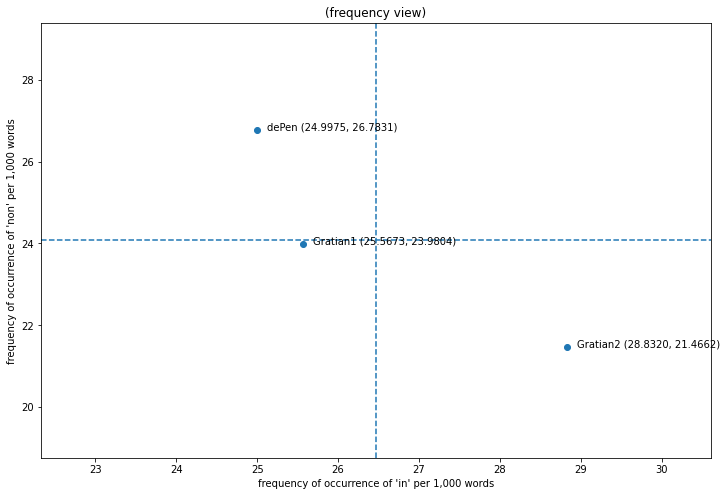

In [7]:
import matplotlib.pyplot as pp

x_values = frequencies[samples].values[0].tolist()
y_values = frequencies[samples].values[1].tolist()
pp.figure(figsize=(12, 8)) # Jupyter
# pp.figure(figsize=(8.0,4.8), dpi=300)
pp.scatter(x_values, y_values)
pp.axis([means['mean'].tolist()[0] - 2 * standard_deviations['std'].tolist()[0],
        means['mean'].tolist()[0] + 2 * standard_deviations['std'].tolist()[0],
        means['mean'].tolist()[1] - 2 * standard_deviations['std'].tolist()[1],
        means['mean'].tolist()[1] + 2 * standard_deviations['std'].tolist()[1]])
pp.axhline(means['mean'].tolist()[1], linestyle='dashed')
pp.axvline(means['mean'].tolist()[0], linestyle='dashed')
pp.xlabel(f'frequency of occurrence of \'{frequencies[samples].index.values[0]}\' per 1,000 words')
pp.ylabel(f'frequency of occurrence of \'{frequencies[samples].index.values[1]}\' per 1,000 words')
labels = list(frequencies[samples].columns)
for i in range(len(labels)):
    pp.annotate(
        f'{labels[i]} ({x_values[i]:.4f}, {y_values[i]:.4f})',
        (x_values[i], y_values[i]),
        textcoords="offset points",
        xytext=(10,0),
        ha='left'
    )
pp.title('(frequency view)')
# pp.savefig('./PNGs/Figure_0a') # PNG
pp.show()

---

The formula used to calculate the z-score is:

$z=\frac{x - \bar{x}}{s}$

![z-score](JPGs/z-score.jpg)

For the frequency of *in* in the first-recension *dicta* (Gratian1):

$z =
\frac{x - \bar{x}}{s} =
\frac{25.5673 - 26.4656}{2.0691} =
\frac{-0.8983}{2.0691} =
-0.4342$,

for the frequency of *in* in the *dicta* from *de Penitentia* (dePen):

$z =
\frac{x - \bar{x}}{s} =
\frac{24.9975 - 26.4656}{2.0691} =
\frac{-1.4681}{2.0691} =
-0.7095$,

and for the frequency of *in* in the second-recension *dicta* (Gratian2):

$z =
\frac{x - \bar{x}}{s} =
\frac{28.8320 - 26.4656}{2.0691} =
\frac{2.3664}{2.0691} =
1.1437$.

Because both the numerator and the denominator of the formula for calculating z-scores have units of frequency of occurrence per 1,000 words, z is a dimensionless number.

In [8]:
z_scores = (frequencies - means.values) / standard_deviations.values
f.write(z_scores.round(4).to_markdown() + '\n\n')
z_scores

,Gratian0,Gratian1,dePen,Gratian2
in,-2.8702,-0.4342,-0.7095,1.1437
non,-6.5491,-0.0361,1.0176,-0.9814
et,-3.2375,-0.9786,1.0201,-0.0414
est,-3.5264,0.4179,0.7233,-1.1412


|     |   Gratian0 |   Gratian1 |   dePen |   Gratian2 |
|:----|-----------:|-----------:|--------:|-----------:|
| in  |    -2.8702 |    -0.4342 | -0.7095 |     1.1437 |
| non |    -6.5491 |    -0.0361 |  1.0176 |    -0.9814 |
| et  |    -3.2375 |    -0.9786 |  1.0201 |    -0.0414 |
| est |    -3.5264 |     0.4179 |  0.7233 |    -1.1412 |

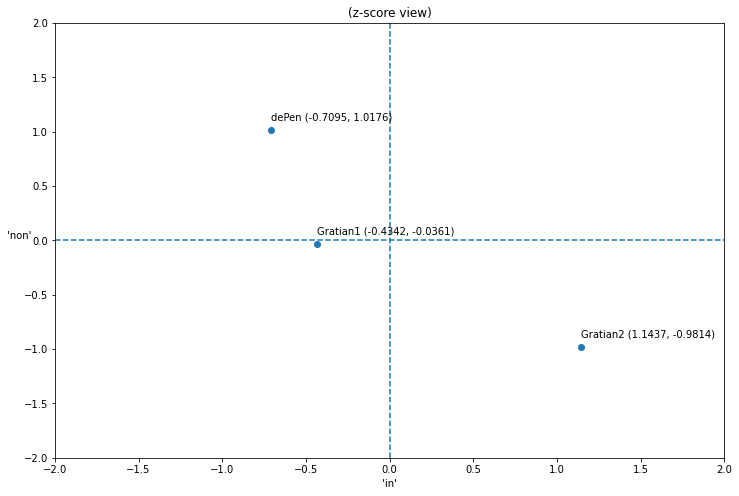

In [9]:
x_values = z_scores[samples].values[0].tolist()
y_values = z_scores[samples].values[1].tolist()
pp.figure(figsize=(12, 8)) # Jupyter
# pp.figure(figsize=(8.0,4.8), dpi=300)
pp.scatter(x_values, y_values)
pp.axis([-2, 2, -2, 2])
pp.axhline(linestyle='dashed')
pp.axvline(linestyle='dashed')
pp.xlabel(f'\'{z_scores.index.values[0]}\'')
pp.ylabel(f'\'{z_scores.index.values[1]}\'', rotation = 'horizontal')
labels = list(z_scores[samples].columns)
for i in range(len(labels)):
    pp.annotate(
        f'{labels[i]} ({x_values[i]:.4f}, {y_values[i]:.4f})',
        (x_values[i], y_values[i]),
        textcoords="offset points",
        xytext=(0,10),
        ha='left'
    )
pp.title('(z-score view)')
# pp.savefig('./PNGs/Figure_0b') # PNG
pp.show()

Labels on the axes of the plot refer to standard deviations (values of z) away from the mean of means (represented by the dashed lines).

Figures 0a and 0b represents the axes as orthogonal (perpendicular) to one another. Although doing so is acceptable as a first-order approximation in a simplified representation of this kind, plotting the values along orthogonal axes invokes an implicit assumption that the word frequencies (in this case, of *in* and *non*) are completely independent of one another, i.e., that there is no correlation or covariance relationship between the words' frequency of occurrence in the samples. This is not necessarily the case, and an advanced technique introduced below, principal component analysis (PCA), handles this problem in a more mathematically sophisticated way.

## Burrows's Delta

Attempts to attribute authorship are typically undertaken in scenarios where there is a large (enough) number of texts securely attributable to a known author, and a text, or at most a small number of texts, of unknown authorship. The attempt is then made to attribute the unknown text to the known author, or to rule out such an attribution. Take *The Federalist* as an example. There are numbers of *The Federalist* of disputed or unknown attribution, a small and well-defined number of candidates for authorship --- Hamilton, Jay, Madison --- to whom those numbers might be attributed, and securely attributed samples from each of the candidates, from the same work no less. Such an approach is not possible in the case of the *dicta* from Gratian’s *Decretum*. As the survey in Chapter 3 above indicated, near-contemporaries knew next to nothing about Gratian. Perhaps most notably, although Gratian was thought to have been a teacher, no one in the generation following made an unambiguous claim to have been his student. **There are no other writings securely, or even insecurely, attributed to him.**

This does not mean that we are unable to apply the established techniques of authorship attribution to Gratian’s *dicta*. It simply means that we will have to adapt the tradtional assumptions behind the design of authorship attribution experiments for a different set of circumstances. Every authorship attribution experiment starts from an hypothesis (sometimes implicitly rather than explicitly stated) concerning authorship of the text under consideration. The hypothesis traditional in Gratian studies has been that the *dicta* from the *Decretum* --- defined as the hypothetical case statements (*themata*) plus the first- and second-recension *dicta* including the *dicta* from *de Pen*. --- are the work of a unitary author, the eponymous Gratian, **In this view, the *dicta* represent a complete, closed, corpus -- the total population of words attributable to the author Gratian.**

Now, break the consolidated z-scores dateframe into two dataframes: one for the hypothetical case statements (*themata*), the other for the first- and second recension *dicta* (including the *dicta* from *de Pen*.) with which we want to compare the case statements.

In [10]:
test = z_scores[[unknown]]
corpus = z_scores[samples]
f.write(test.to_markdown() + '\n\n')
test

,Gratian0
in,-2.8702
non,-6.5491
et,-3.2375
est,-3.5264


$\Delta_B = \frac{1}{N}\sum_{i = 1}^N|z_i(t) - z_i(c)|$

![Burrows's Delta](JPGs/Burrows.jpg)

In [11]:
# tmp = (corpus - test.values).abs()
tmp = (test.values - corpus).abs()
f.write(tmp.to_markdown() + '\n\n')
tmp

,Gratian1,dePen,Gratian2
in,2.4360,2.1606,4.0139
non,6.5130,7.5667,5.5677
et,2.2589,4.2576,3.1961
est,3.9443,4.2497,2.3852


In [12]:
# is there a better way to do this?
deltas = (tmp.mean(axis = 0)).to_frame(unknown).transpose()
f.write(deltas.to_markdown() + '\n\n')
f.close()
deltas

,Gratian1,dePen,Gratian2
Gratian0,3.7880,4.5586,3.7907


Calculating  Burrows's Delta ($\Delta_B$) for Gratian0 with respect to Gratian1 and Gratian2 has limited value. The values of $\Delta_B$ for Gratian0 with respect to both Gratian1 and Gratian2 are the same:

||Gratian1|Gratian2|
|-:|-:|-:|
|**Gratian0**|5.120042|5.120042|

This appears to be related to the problem of mean-of-means comparisons between two samples yielding standard deviations of 1.0 and -1.0.

Adding a third comparison, to the first- and second-recension *dicta* in *de Pen*., makes for a better demo. **Explain and justify the fact that I am separating the first- and second-recension *dicta* in Gratian1 and Gratian2, but keeping them together in dePen.** The values of $\Delta_B$ for Gratian0 with respect to Gratian1, dePen1, and Gratian2 are:

||Gratian1|dePen|Gratian2|
|-:|-:|-:|-:|
|**Gratian0**|3.788037|4.558648|3.790723|

To put those values of $\Delta_B$ in context, if we substitute a 3917-word sample from the pseudo-Augustinian *De vera et falsa penitentia* in place of Gratian0, the values of $\Delta_B$ for pseudo-Augustine with respect to Gratian1, dePen1, and Gratian2 are:

||Gratian1|dePen|Gratian2|
|-:|-:|-:|-:|
|**ps-Aug**|2.691456|1.783147|3.477697|

\[Gratian quotes *De vera et falsa penitentia* extensively in *de Pen*., and the sample was created by concatenating *De Pen*. D.1 c.88, D.3 c.32, D3 c.42, D.3 c.45, D.3 c49, D.5 c.1, D.6 c.1, and D.7 c.6. (This has the incidental advantage of guaranteeing orthographic consistency with the other samples derived from the Friedberg edition.) As noted in Chapter 0 above, *De vera et falsa penitentia* is extremely unlikely to have been written by Gratian. Gratian and pseudo-Augustine had markedly different preferences in postpositive conjunctions: pseudo-Augustine strongly preferred *enim*, while Gratian preferred *autem*. John Wei, *Gratian the Theologian*, 84, describes Gratian's *Decretum* as "the first work to draw on *De vera et falsa penitentia*. **wc -l reports 3918 words, tokenizer reports 3917. Verify that these are all the pseudo-Augustine quotes in *de Pen*. To reproduce March 2014 enim/autem boxplots, use oppose.**\]

In each case, the value of $\Delta_B$ for pseudo-Augustine is *lower* than the corresponding value for Gratian0. Keep in mind that the lowest value of Burrows's Delta ($\Delta_B$) indicates the most likely attribution of authorship. Therefore, pseudo-Augustine is *more* likely than the author of Gratian0 to be author of Gratian1, dePen, and Gratian2 (significantly more likely in the cases of Gratian1 and dePen).

